# import data

In [11]:
import pandas as pd

#train = pd.read_csv("training.csv")
#train

train = pd.read_pickle('dataFixed.pkl')
train.head()


,type,verbs,adjectives,noun,properNoun
0,fake,12,5,17,98
1,fake,40,43,88,575
2,fake,18,13,35,206
3,fake,100,60,128,837
4,fake,23,10,54,232


In [53]:
#data.iloc[:,0]

#train.iloc[:,0].values

In [12]:
#predictor_Vars= ["pronouns", "generalizingWords"]
#X,y = train[predictor_Vars], train.iloc[:,0].values
predictor_Vars=["verbs", "adjectives", "noun", "properNoun"]
X,y=train[predictor_Vars], train.iloc[:,0].values

In [57]:
#X

In [58]:
#y

In [7]:
#encoding categorical data 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [8]:
X.head()

,verbs,adjectives,noun,properNoun
0,12,5,17,98
1,40,43,88,575
2,18,13,35,206
3,100,60,128,837
4,23,10,54,232


In [59]:
#y

# split test data into training and testing sets

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
#test size is gonna be the amount of data you take from overall set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)
X_train

C:\Users\misae\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,verbs,adjectives,noun,properNoun
379,19,10,49,245
586,8,16,47,182
257,60,63,164,731
255,30,35,100,421
607,16,23,52,211
364,49,42,131,418
132,8,8,20,108
333,4,6,16,59
305,31,50,73,416
532,95,55,198,848


In [46]:
#y_train

# feature scalar 

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_test
#everything is on the same scale

array([[ 0.52653267,  0.0790758 ,  1.0357347 ,  0.70715098],
       [-0.63535791, -0.72912541, -0.74231262, -0.81019313],
       [ 0.13923581,  0.21842084,  0.1280602 ,  0.6282926 ],
       ...,
       [-0.41404542, -0.22748328, -0.28225842, -0.24458815],
       [-0.27572511, -0.25535228, -0.25739062, -0.06239809],
       [-0.30338918, -0.28322129, -0.10818385, -0.25002666]])

# 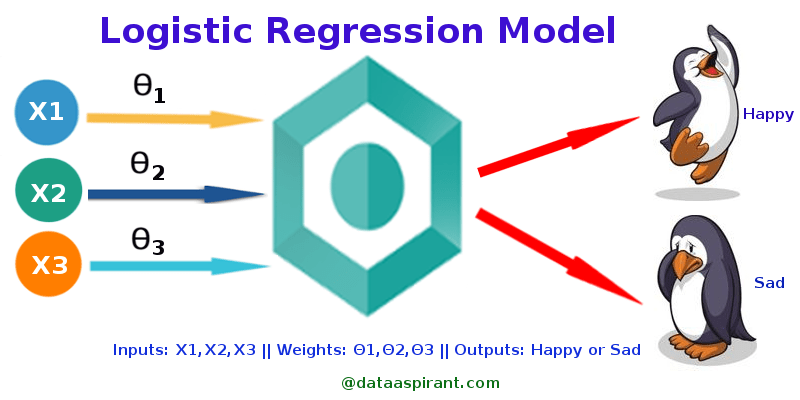

In [20]:
#chosen classifier = logitistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
#fitted logistic regression on my xtrain and ytrain
#set the predicted variable (ys predicted value after the model is complete)
y_pred = classifier.predict(X_test)
#y_pred

In [22]:
#make confusion matrix= the matrix that is going to show me the number of correct results and the number of incorrect results 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [23]:
#print out confusion matrix 
# 154 correct assumptions 120 incorrect assumptions 
cm

array([[ 77,  68],
       [ 52, 102]], dtype=int64)

In [44]:
#encoding categorical data 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)
#y_test
y_pred = labelencoder_y.fit_transform(y_pred)
#y_pred

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
    
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Pronouns')
plt.ylabel('Generalizing Words')
plt.legend()
plt.show()

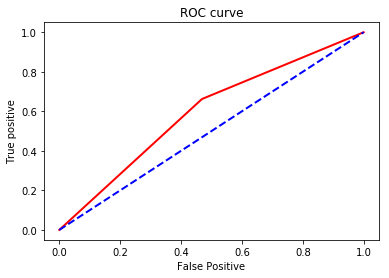

In [36]:
from sklearn.metrics import roc_curve 
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_test, y_pred,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive')
plt.ylabel('True positive')
plt.title('ROC curve')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=5)
scores

array([0.35678392, 0.46231156, 0.49748744, 0.56281407, 0.45454545])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.47 (+/- 0.13)


In [67]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
featureClf = ExtraTreesClassifier(n_estimators=50)
featureClf = clf.fit(X_train, y_train)
clf.feature_importances_  



array([0.21707125, 0.19393186, 0.254797  , 0.33419989])

In [48]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel 

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)


In [56]:
y_predict = clf.predict(X_test)
#y_predict

In [60]:
#encoding categorical data 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)
#y_test
y_predict = labelencoder_y.fit_transform(y_predict)
#y_pred

In [61]:
#make confusion matrix= the matrix that is going to show me the number iof correct results and the number of incorrect results 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[88, 57],
       [83, 71]], dtype=int64)

In [64]:
from sklearn.model_selection import cross_val_score
scoresRF = cross_val_score(clf, X, y, cv=5)
scoresRF

array([0.37688442, 0.52261307, 0.5879397 , 0.55276382, 0.57575758])

In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresRF.mean(), scoresRF.std() * 2))

Accuracy: 0.52 (+/- 0.15)


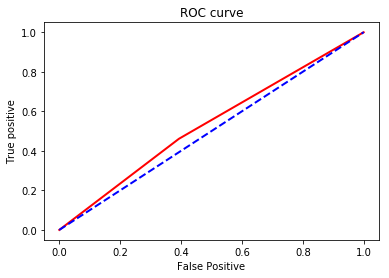

In [66]:
from sklearn.metrics import roc_curve 
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_test, y_predict,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive')
plt.ylabel('True positive')
plt.title('ROC curve')
plt.show()